# ASTR 1040 Problem Set 7

The first cell (below) contains lots of helpful constants you may need to use throughout the semester. Make sure to run it each time before you start working! 

For reference, all of the `astropy` constants as well as examples can be found [here](https://docs.astropy.org/en/stable/constants/index.html). Likewise all of the units and their names / how to access them can be found [here](https://docs.astropy.org/en/stable/units/index.html). 

To create a variable with units you need to multiply by the corresponding unit class:

```python
d = 1 * units.au
```

You can then convert unitful quantities to other units by calling the `to` method and passing the desired end unit class: 

```python
d_m = d.to(units.m)
```

If you have a ratio of quanities where all the units should cancel out, you can obtain the dimensionles number using the `dimesionless_unscaled` method. For example writing:
```python
d_m/d
``` 
yields $1.4959787\times 10^{11} \rm{\frac{m}{AU}}$, but doing:
```python
(d_m/d).to(units.dimensionless_unscaled)
```
returns `1.0` as expected.

In [1]:
#SETUP CELL (modify at your own peril)
from astropy import units #access units by doing units.<unit> (i.e. units.au)
from astropy import constants
import numpy as np #common math functions (i.e. np.sin(x)) and better arrays (i.e. np.array([1,2,3])
import matplotlib.pyplot as plt #plotting functions (i.e. plt.plot(x,y))
G = constants.G # gravitational constant
M_sun = constants.M_sun # mass of the sun
R_sun = constants.R_sun # radius of the sun
L_sun = constants.L_sun # luminosity of the sun
M_earth = constants.M_earth # mass of the earth
R_earth = constants.R_earth # radius of the earth
M_jup = constants.M_jup # mass of jupiter
R_jup = constants.R_jup # radius of jupiter
sigma_sb = constants.sigma_sb # Stefan-Boltzmann constant
b_wien = constants.b_wien # Wien's displacement constant
c = constants.c # speed of light
h = constants.h # Planck constant
k_B = constants.k_B # Boltzmann constant
m_e = constants.m_e # mass of electron
m_p = constants.m_p # mass of proton 
m_n = constants.m_n # mass of neutron (basically just the mass of a proton but whatever)
g0 = constants.g0 # standard gravity, 9.8 m/s^2
e = constants.e # absolute value of electron/proton charge

## 1: Milky Way Dynamics [20 points]

In last week's problem set you (should have) found that the mass of the supermassive black hole at the heart of our galaxy is roughly $4\times 10^6 M\odot$, which you found by looking at the orbit of the famous "S2" star. We will now repeat this exercise (in a simpler way) for the entire Milky Way! 

The Large Magellanic Cloud (LMC) is a small dwarf galaxy that orbits the Milky Way. Currently it is at a distance of roughly 160,000 lightyears from the galactic center and moving at a velocity of roughly 300 km/s. 

### a) [10 points] Assuming the orbit is roughly circular, what is the mass enclosed within the LMC's orbit? 

**Solution: Using $v=\sqrt{\frac{GM}{r}}$ with $r = 160000 \rm{ly}$ and $v = 300 \rm{km/s}$ we can do some algebra and obtain:**

$$M = \frac{v^2 r}{G} = \frac{(300 \rm{km/s})^2 (160000 \rm{ly})}{G} \approx \boxed{10^{12} \rm{M_\odot}}$$

**As the calculation shows in the cell below:**

In [4]:
v = 300*units.km/units.s; r = 160e3*units.lyr
M = v**2*r/G
M.to(units.M_sun)

<Quantity 1.02653918e+12 solMass>

### b) [10 points] How does your estimate compare to the estimated mass of the black hole (Sag A*) you found last week? Do you think Sag A* has much of an impact on the orbit of the Sun in the Milky Way? 

**Solution: The mass of Sag A\* found in last week's homework was roughly 4 million solar masses, but this number is more than a trillion solar masses! The ratio is thus roughly $\frac{M_G}{M_{BH}} \approx \frac{10^{12} M_\odot}{4\times 10^6 M_\odot} \approx \boxed{2.5 \times 10^5}$. Thus the black hole is around a thousandth of a percent of the total mass of the galaxy, and since we are very far from the center of the galaxy its mass has basically no impact on the Sun's orbit.**

## 2: Galaxy Rotation Curves [60 points]

In this problem we are going to build up a rotation curve for an idealized galaxy, considering both visible matter and dark matter. To do this we'll make several assumptions: 

1. We are going to assume our idealized galaxy is a perfect sphere.
2. We are going to assume most of the idealized galaxy's mass is located within its core, with a constant mass density of $\rho_c = 0.01 \frac{M_\odot}{\rm{ly}^3}$ (about one star every 4.6 cubic light years) in the core (we will neglect the supermassive black hole at the very center and assume its mass gets averaged into this density).
3. We are going to assume that all of the objects in our idealized galaxy are on circular orbits. 

To start we will consider visible matter only:

### a) [10 points] Calculate the rotation speed ($v(r)$) of the galaxy as a function of distance inside the core ($r<r_c$)

**Solution: Inside the core the mass will be increasing with radius cubed, since the density is assumed to be constant. To get v(r) we need to know M(r), i.e.:**

$$M(r<r_c) = \rho_c*V = \rho_c*\frac{4}{3}\pi r^3$$

**Then the velocity as a function of radius will be:**

$$v(r<r_c) = \sqrt{\frac{GM(r)}{r}} = \sqrt{\frac{4G\rho_c\pi r^3}{3r}} = \sqrt{\frac{P4G\rho_c\pi r^2}{3}} = \boxed{2r\sqrt{\frac{G\rho_c\pi}{3}}}$$

**Thus the velocity is just a linear function of r! This means it will increase linearly as we move out through the core of the galaxy.**

### b) [10 points] Calculate the rotation speed ($v(r)$) of the galaxy as a function of radial distance outside the core ($r>r_c$)
Note that as stated in assumption 2, we are assuming that there is no mass outside of the core.

**Solution: Outside the core (considering visible matter only) there is no more mass to add, so now v(r) will decrease like:**

$$v(r>r_c) = \sqrt{\frac{GM(r_c)}{r}} = \boxed{\sqrt{\frac{4G\rho_c\pi r_c^3}{3r}}}$$

**Thus the velocity will decrease like 1 over the square root of r outside of the core.**

### c) [10 points] Plot $v(r)$ (in units of km/s) versus $r$ (in units of 1000's of ly) for $0.1<r<5\times10^4 \rm{ly}$
Note: if you're doing this in a Jupyter notebook and want to get your extra credit points you'll need to make the plot in your Jupyter notebook, which you should use the [matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html) library to do. This will require slightly more advanced coding than you have done thus far in the semester, so come see Kirk if you need help. 

**Solution: See plot at the end, which includes both parts c and f**

### d) [10 points] Considering visible matter only, where is the fastest rotation speed and what is the corresponding orbital period at this distance?
Provide your answers in km/s and years. 

**Solution: two ways to do this: the first (and easiest way) is just to look at the plot! We can see it peaks around 240 km/s at the core radius. We can also exactly calculate this mathematically because we know the velocity will be highest where we stop adding mass (at the core radius):**

$$v_{max} = v(r_c) = \sqrt{\frac{GM(r_c)}{r_c}} = 2r_c\sqrt{\frac{G\rho_c\pi}{3}} \approx \boxed{242 \rm{km/s}}$$

**The cell below calculates this:**

In [9]:
rc = 1e4*units.lyr; ρc = 0.01*units.M_sun/units.lyr**3
vmax = 2*r_c*np.sqrt(G*ρc*np.pi/3)
vmax.to(units.km/units.s)

<Quantity 242.40288628 km / s>

### e) [10 points] Adding dark matter:

Suppose we added a fourth assumption to our list &mdash; that there was a substantial amount of dark matter in these galaxies. Observationally it is observed that galaxy velocity curves "flatten out" past a certain radius. Let's assume this radius in our case is the core radius $r_c$ &mdash; mathematically, if we want to make $v(r)$ constant we will need to make $M\propto r$. 

Show that the total mass as a function of radius must then be:

$$M(r>r_c) = \frac{4}{3}\pi \rho_c r_c^2r \textrm{ for } r>r_c$$ 

*Hint: What should the difference in velocities between some radius $r$ and the radius of the core $r_c$ be?*

**Solution: to make sure we get a flat velocity curve we need every v to equal $v_{max}$ outside of the core, thus:**

$$v(r>r_c) = v_{max} \rightarrow \sqrt{\frac{GM}{r}} = \sqrt{\frac{4G\rho_c\pi r_c^2}{3}}$$

**We can then solve for $M$ to obtain the expected relationship:**

$$\boxed{M(r>r_c) = \frac{4\rho_c\pi r_c^2r}{3}}$$

**Note that this is an interesting relationship, as it implies that the density of dark matter in a galaxy $\rho_{DM} \propto r^{-2}$, thus its density drops off quite rapidly (compare that to the visible matter case where the density was constant!) but its extent is simply much larger than the visible matter.**

### f) [10 points] Final results:
Remake your plot from part c with your new addition of dark matter to the galaxy's density profile. Compare the amount of dark matter vs. normal matter required to make this idealized velocity curve &mdash; what fraction of the total is dark matter and what fraction is normal matter? What sets this value in this problem? How does this compare to what you would expect to find in the "real" universe? 

**Solution: The plot is below. Essentially we have a piecewise function for the velocity (because the mass inside some radius r is a piecewise function) where inside of $r_c$ it is increasing with r and then outside of $r_c$ it flattens out at $v_{max}$.**

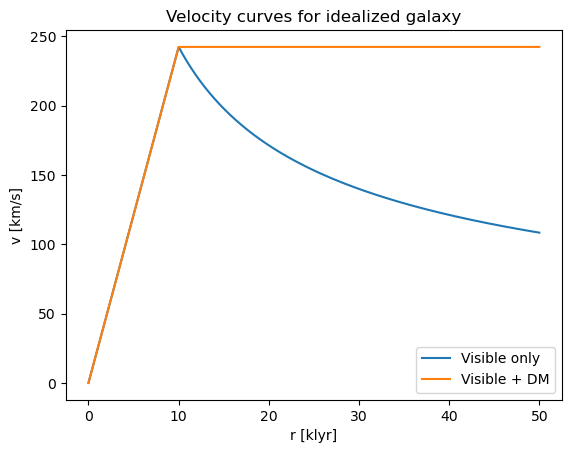

In [8]:
r_c = 1e4*units.lyr; ρ_c = 0.01*units.M_sun/(units.lyr)**3; 
v = lambda r, M : np.sqrt(G*M/r)

def M(r,r_c,ρ_c, DM = False):
    V = 4/3*np.pi*r**3
    if r <= r_c:
        return V*ρ_c
    else:
        M_DM = lambda r : 4/3*np.pi*(r-r_c)*ρ_c*r_c**2 if DM else 0.0*units.M_sun
        return M(r_c,r_c,ρ_c) + M_DM(r) #dark matter portion only operates outside of r_c
    
import matplotlib.pyplot as plt
r = np.linspace(0.1,5e4,1000)*units.lyr
M_vis = [M(ri,r_c,ρ_c) for ri in r]
v_vis = [v(ri,Mi) for (ri,Mi) in zip(r,M_vis)]
M_DM = [M(ri,r_c,ρ_c,DM = True) for ri in r]
v_DM = [v(ri,Mi) for (ri,Mi) in zip(r,M_DM)]
plt.plot([r.to(units.klyr).value for r in r],[v.to(units.km/units.s).value for v in v_vis],label="Visible only")
plt.plot([r.to(units.klyr).value for r in r],[v.to(units.km/units.s).value for v in v_DM],label="Visible + DM")
plt.legend(); plt.xlabel("r [klyr]"); plt.ylabel("v [km/s]"); plt.title("Velocity curves for idealized galaxy");

In [14]:
visRatio = M(5e4*units.lyr,r_c,ρ_c)/M(5e4*units.lyr,r_c,ρ_c,DM=True)
visRatio

<Quantity 0.2>

**Solution: as shown above, the ratio of visible matter to the total is 1/5, thus the dark matter is 4/5. Usually online you will find things showing that the total mass energy budget of the universe is roughly 5% visible matter, 25% dark matter, and 70% dark energy. Comparing just the matter and dark matter we can see they add up to about 30%, thus in the real universe the ratio of visible matter to the total matter is 1/6 and dark matter is 5/6, which is pretty close to the numbers in the problem here! It turns out that's a little bit of cheating on our part, as the ratio in this simplified problem depends only on the ratio of where the core ends to where the galaxy ends.**

## Time dilation snake oil [20 points]

Recently you hurt yourself skiing, and the doctor's told you that you'll probably be out the rest of the season to recover. You're a poor college student though, and you don't want to waste your very expensive ski pass. You heard from a friend that general relativity says that time passes slower for people deeper in gravitational fields, and since ski mountains are at high elevations you plan to just chill out in the lodge for a bit and figure you'll recover faster than if you stayed in the hospital. 

### a) [5 points] Qualitatively, is there any truth behind your friend's claim that you should heal faster on top of the mountain? Why or why not?

**Solution: yes, there is *some* truth to this. GR tells us that time passes slower for clocks deeper in gravitational wells, thus someone in Boulder (closer to the Earth's center) will experience slightly less time than someone on top of a mountain (farther from the Earth's center). However because the distances involved are very small (astrophysically speaking) the magnitude of the effect will be very small, thus you aren't going to actually have a meaningful difference in your healing time by staying up on top of the mountain.**

### b) [10 points] Say the doctor said it would take 3 months for your injury to heal at the hospital. How much faster/slower will you heal on the mountain?

Let's say the hospital that gave you this healing time estimate is in Boulder (roughly 1.5 km above sea level) and you plan to hang out and heal at the A-basin lodge (almost 4 km above sea level!).

Express your answer as a time difference (i.e. $t_B - t_A$) in units of microseconds.

**Solution: We need to use the GR time dilation equation for stationary objects in the Schwarzschild metric:**

$$\frac{t_o}{t_\infty} = \sqrt{1-\frac{R_s}{r}}$$ 

**where $R_s = \frac{2GM}{c^2}$. Neither of our observers is at infinity, but we can do some algebra to get the ratio of time between two observers and cancel these infinities out:**

$$\frac{t_A}{t_B} = \sqrt{\frac{1-\frac{R_s}{r_A}}{1-\frac{R_s}{r_B}}}$$

**where $t_A$ is the time at A-basin, $t_B$ the time in Boulder, $R_s = \frac{2GM_\oplus}{c^2}$ the Schwarzschild radius of the Earth, $r_A = r_\oplus + 4 \rm{km}$ the radius from the center of the Earth to A-basin, and $r_B = r_\oplus + 1.5 \rm{km}$ is the radius of the Earth to Boulder.**

**We are asked to express our answer in terms of a time *difference*, so let's set up a new ratio:**

$$\frac{t_B - t_A}{t_B} = 1 - \frac{t_A}{t_B} = 1 - \sqrt{\frac{1-\frac{R_s}{r_A}}{1-\frac{R_s}{r_B}}}$$

**Thus:**

$$t_B - t_A = \boxed{t_B\left (1 - \sqrt{\frac{1-\frac{R_s}{r_A}}{1-\frac{R_s}{r_B}}}\right )}$$

**or, equivalently:**

$$t_A - t_B = \boxed{t_B\left (\sqrt{\frac{1-\frac{R_s}{r_A}}{1-\frac{R_s}{r_B}}} - 1 \right )}$$

**Note you can also get two more (very similar) equivalent equations if you solve for $t_B/t_A$ instead of $t_A/t_B$ but numerically your answer should be the same as what is calculated below:** 

In [14]:
Rs = 2*G*M_earth/c**2
tA_B = np.sqrt((1-Rs/(R_earth+4*units.km))/(1-Rs/(R_earth+1.5*units.km))) #ratio of A-basin - Boulder time
tB = 90*units.day #~3 months
tB_minus_tA = tB*(1-tA_B) #algebra
tB_minus_tA.to(units.microsecond)

<Quantity -2.11683471 us>

**This means that after 3 months have passed in Boulder, someone at A-basin will have experienced an extra *2 microseconds* compared with a person in Boulder! Thus, do to the effects of GR, if you live at A-basin for 3 months you will be slightly older than your classmates living in Boulder.**

### c) [5 points] What would you need to change in this problem to make this a more meaningful difference? 

**Solution: We would need a *much* bigger difference in the radii, and ideally one of them would be quite close to the Schwarzschild radius. We can see in the time dilation equation that it is maximized as $r\rightarrow R_s$, so for this to make a meaningful difference we need to be much closer to $R_s$ than the Earth allows, so we'd need a white dwarf, neutron star, or (best) a black hole.**